<a href="https://colab.research.google.com/github/Gmentesh2/portfolio_opt_multiple_stocks/blob/main/portfolio_opt_multiple_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import yfinance as yf
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [5]:
symbols = ['FB', 'DIS', 'PFE', 'NFLX', 'AAPL','GS', 'AES', 'MSCI', 'TSLA', 'WMT', 'F','BABA']
df = yf.download(symbols, start = '2018-01-01', end = '2021-09-01')

[*********************100%***********************]  12 of 12 completed


In [6]:
df = df['Adj Close']
df

,AAPL,AES,BABA,DIS,F,FB,GS,MSCI,NFLX,PFE,TSLA,WMT
Date,,,,,,,,,,,,
2018-01-02,41.188171,9.545206,183.649994,108.726059,10.835854,181.419998,237.127731,122.792107,201.070007,29.757999,64.106003,91.389343
2018-01-03,41.180988,9.536433,184.000000,109.192856,10.921446,184.669998,234.920349,124.657837,205.050003,29.978495,63.450001,92.186539
2018-01-04,41.372269,9.501341,185.710007,109.144234,11.109744,184.330002,238.203613,126.619766,205.630005,30.043821,62.924000,92.269958
2018-01-05,41.843307,9.536433,190.699997,108.551003,11.298046,186.850006,236.988647,127.937302,209.990005,30.100986,63.316002,92.816856
2018-01-08,41.687893,9.536433,190.330002,106.994987,11.255250,188.279999,233.547653,128.110428,212.050003,29.766171,67.281998,94.188766
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,148.143784,24.114227,169.100006,178.309998,13.104018,368.390015,408.964142,626.909668,547.580017,47.096592,711.200012,148.362640
2021-08-26,147.324982,23.726572,165.240005,176.559998,12.835370,364.380005,408.261261,622.916016,550.119995,46.967728,701.159973,146.759109
2021-08-27,148.383453,24.044649,159.470001,180.139999,13.243318,372.630005,415.468048,628.587036,558.919983,46.194511,711.919983,145.932434


In [7]:
df[:5]

,AAPL,AES,BABA,DIS,F,FB,GS,MSCI,NFLX,PFE,TSLA,WMT
Date,,,,,,,,,,,,
2018-01-02,41.188171,9.545206,183.649994,108.726059,10.835854,181.419998,237.127731,122.792107,201.070007,29.757999,64.106003,91.389343
2018-01-03,41.180988,9.536433,184.000000,109.192856,10.921446,184.669998,234.920349,124.657837,205.050003,29.978495,63.450001,92.186539
2018-01-04,41.372269,9.501341,185.710007,109.144234,11.109744,184.330002,238.203613,126.619766,205.630005,30.043821,62.924000,92.269958
2018-01-05,41.843307,9.536433,190.699997,108.551003,11.298046,186.850006,236.988647,127.937302,209.990005,30.100986,63.316002,92.816856
2018-01-08,41.687893,9.536433,190.330002,106.994987,11.255250,188.279999,233.547653,128.110428,212.050003,29.766171,67.281998,94.188766


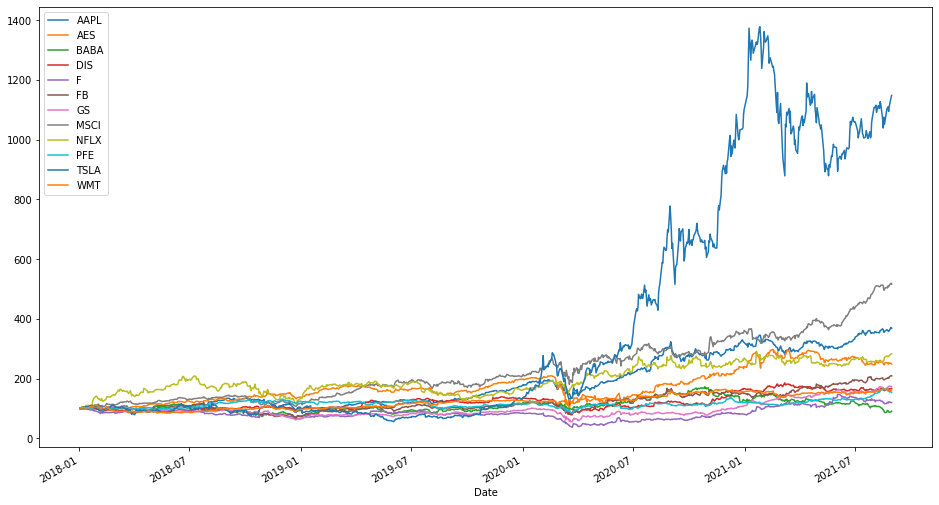

In [8]:
(df / df.iloc[0] * 100).plot(figsize=(16,9))

In [9]:
returns = np.log(df / df.shift(1))
mean_return = returns.mean() * 252

mean_return

AAPL    0.356176
AES     0.248872
BABA   -0.025992
DIS     0.139754
F       0.049026
FB      0.201634
GS      0.150549
MSCI    0.448482
NFLX    0.284405
PFE     0.117069
TSLA    0.666983
WMT     0.130849
dtype: float64

In [10]:
returns.cov() * 252

,AAPL,AES,BABA,DIS,F,FB,GS,MSCI,NFLX,PFE,TSLA,WMT
AAPL,0.113308,0.047225,0.059944,0.047583,0.045099,0.076061,0.061947,0.071018,0.070029,0.034196,0.095386,0.031450
AES,0.047225,0.144203,0.031199,0.057192,0.068295,0.044489,0.070090,0.062098,0.032133,0.031364,0.074131,0.023879
BABA,0.059944,0.031199,0.133677,0.033192,0.038696,0.060748,0.046191,0.051614,0.064755,0.022416,0.077196,0.015425
DIS,0.047583,0.057192,0.033192,0.100491,0.062655,0.044628,0.068436,0.047684,0.033843,0.028755,0.054111,0.021850
F,0.045099,0.068295,0.038696,0.062655,0.157357,0.045204,0.082065,0.045748,0.024202,0.029251,0.072763,0.015590
FB,0.076061,0.044489,0.060748,0.044628,0.045204,0.135889,0.053938,0.069996,0.076186,0.028036,0.082307,0.023661
GS,0.061947,0.070090,0.046191,0.068436,0.082065,0.053938,0.119805,0.060749,0.043406,0.034742,0.075439,0.026063
MSCI,0.071018,0.062098,0.051614,0.047684,0.045748,0.069996,0.060749,0.121828,0.063980,0.033123,0.086290,0.025678
NFLX,0.070029,0.032133,0.064755,0.033843,0.024202,0.076186,0.043406,0.063980,0.169375,0.023757,0.095487,0.028567
PFE,0.034196,0.031364,0.022416,0.028755,0.029251,0.028036,0.034742,0.033123,0.023757,0.062739,0.024156,0.021885


In [11]:
corr_df = returns.corr()

corr_df

,AAPL,AES,BABA,DIS,F,FB,GS,MSCI,NFLX,PFE,TSLA,WMT
AAPL,1.000000,0.369445,0.487066,0.445918,0.337746,0.612969,0.531678,0.604457,0.505502,0.405575,0.430420,0.404889
AES,0.369445,1.000000,0.224712,0.475102,0.453373,0.317811,0.533251,0.468507,0.205607,0.329741,0.296517,0.272504
BABA,0.487066,0.224712,1.000000,0.286381,0.266807,0.450725,0.365003,0.404448,0.430351,0.244774,0.320707,0.182830
DIS,0.445918,0.475102,0.286381,1.000000,0.498249,0.381903,0.623715,0.430964,0.259410,0.362145,0.259276,0.298703
F,0.337746,0.453373,0.266807,0.498249,1.000000,0.309131,0.597689,0.330409,0.148244,0.294390,0.278615,0.170317
FB,0.612969,0.317811,0.450725,0.381903,0.309131,1.000000,0.422735,0.544012,0.502180,0.303633,0.339146,0.278155
GS,0.531678,0.533251,0.365003,0.623715,0.597689,0.422735,1.000000,0.502840,0.304711,0.400721,0.331055,0.326309
MSCI,0.604457,0.468507,0.404448,0.430964,0.330409,0.544012,0.502840,1.000000,0.445393,0.378864,0.375513,0.318808
NFLX,0.505502,0.205607,0.430351,0.259410,0.148244,0.502180,0.304711,0.445393,1.000000,0.230464,0.352420,0.300804
PFE,0.405575,0.329741,0.244774,0.362145,0.294390,0.303633,0.400721,0.378864,0.230464,1.000000,0.146488,0.378636


<Figure size 432x288 with 0 Axes>

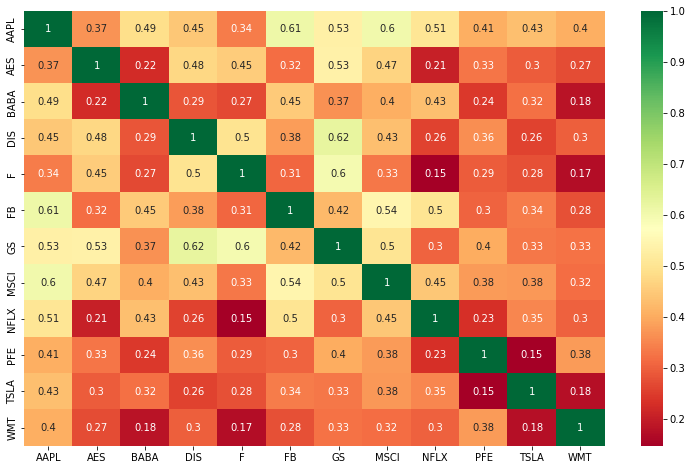

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(13,8))
seaborn.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()

In [15]:
weights = np.random.random(len(symbols))
weights = weights / np.sum(weights)
print(weights)
print('')
print(sum(weights))

[0.09439502 0.030522   0.00231451 0.09105183 0.11032547 0.08887399
 0.1334563  0.07741631 0.07980991 0.06198664 0.14175011 0.08809791]

0.9999999999999998


In [16]:
np.sum(weights * returns.mean()) * 252

0.2680499078579849

In [17]:
p_ret = []
p_vol = []
p_SR = []
p_wt = []

In [19]:
for x in range(10000):
  #geberate random weights
  p_weights = np.random.random(len(symbols))
  p_weights =  p_weights / np.sum(p_weights)

  #add weights using those random weights
  ret_1 = np.sum(p_weights * returns.mean()) * 252
  p_ret.append(ret_1)

  #add volativity or standart deviation to list
  vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
  p_vol.append(vol_1)

  #sharp ratio
  SR_1 = ret_1 / vol_1
  p_SR.append(SR_1)

  #store weights for each portfolio
  p_wt.append(p_weights)

p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt= np.array(p_wt)

In [20]:
len(p_ret)

20000

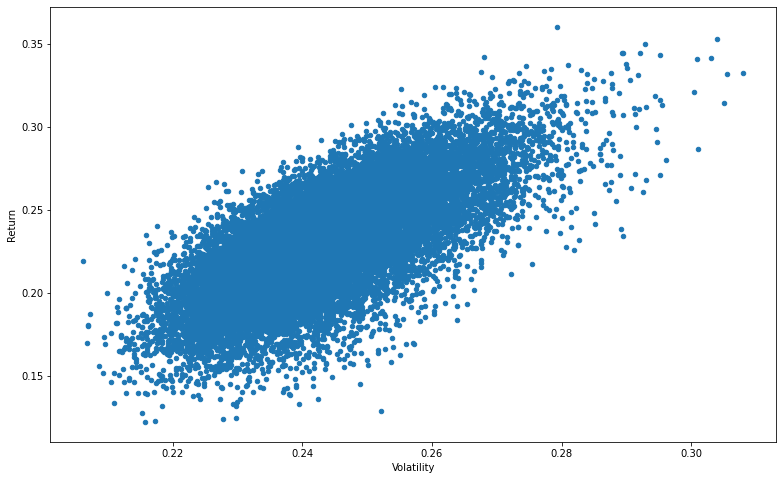

In [21]:
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(13,8))

In [22]:
SR_idx = np.argmax(p_SR)

i = 0
while i < len(symbols):
  print('Stock : %s : %2.2f' % (symbols[i], (p_wt[SR_idx][i] * 100)))
  i += 1

Stock : FB : 18.71
Stock : DIS : 5.78
Stock : PFE : 0.18
Stock : NFLX : 3.66
Stock : AAPL : 2.04
Stock : GS : 0.10
Stock : AES : 1.55
Stock : MSCI : 20.53
Stock : TSLA : 19.14
Stock : WMT : 2.27
Stock : F : 16.31
Stock : BABA : 9.72


In [23]:
print('\nReturn :', p_ret[SR_idx])

print('Volatility :', p_vol[SR_idx])

print('Sharp Ratio :', p_SR[SR_idx])


Return : 0.3603213814536329
Volatility : 0.27931510886074
Sharp Ratio : 1.2900175107723253
